In [1]:
library(tidyverse)
library(ggplot2)
library(patchwork)
source("helper.R")

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.2     v dplyr   1.0.6
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
sinfo_path = "../../output/sims_info.tsv"
sinfoh_path = "../../output/header_sims_info.tsv"

In [3]:
win_size = 1000000
win_len = -1
padding = 0
rescf = 1
prop_acc=0.4

In [4]:
fig_prefix = "cor-pidxy-dT_"

In [5]:
sims_path = "../../output/sims_results/"
data_path = paste0("../../output/greatapes-diversity-data/",fig_prefix,"win-size_",as.integer(win_size),"_merged-mask_True_prop-acc_",prop_acc, ".rds")

In [6]:
data_path

[1] "../../output/greatapes-diversity-data/cor-pidxy-dT_win-size_1000000_merged-mask_True_prop-acc_0.4.rds"

In [7]:
sinfo = read.table(sinfo_path, sep="\t")
h = read.table(sinfoh_path, sep="\t", header=TRUE)
cnames = colnames(h)
if (length(sinfo) == length(h)+1) {
    cnames = c(cnames, "poscoefdecayeps")
}
colnames(sinfo) = cnames

In [8]:
diff_cols = c("delrate","delcoef","posrate","poscoef","mu", "rescf", "win_len", "padding", "chr")
diff_cols = c("delrate","delcoef","posrate","poscoef","mu", "poscoefdecayeps", "rescf", "win_len", "padding", "chr")

In [9]:
wsize_str = paste0("win-size_",as.integer(win_size))

In [10]:
sims_folders = list.files(sims_path)[grep(wsize_str, list.files(sims_path))]

In [11]:
simresults = as.data.frame(do.call(rbind, lapply(X = sims_folders, function(x) unlist(meta_from_fname(x,prop=prop_acc,suffix="$")))), stringsAsFactors =FALSE)

In [12]:
simresults$folderpath = sims_folders

In [13]:
tmp = unique(sinfo[sinfo$sup_rand_id %in% simresults$sup_rand_id,c(diff_cols,"sup_rand_id")])

In [14]:
tmp

,delrate,delcoef,posrate,poscoef,mu,poscoefdecayeps,rescf,win_len,padding,chr,sup_rand_id
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<fct>,<fct>
1,6e-09,-0.015,1e-10,0.01,6.10e-09,NA,10,10000000,500000,chr12,NEI8NNYREFC8EW3LW3
2,2e-09,-0.015,1e-11,0.01,2.01e-09,NA,10,-1,0,chr12,JGESDE9JU38TST1NV5
3,0e+00,0.000,1e-11,0.01,1.00e-11,NA,10,10000000,500000,chr12,FY0VTPYJFVFWM31PI5
4,2e-09,-0.015,1e-10,0.01,2.10e-09,NA,1,10000000,0,chr12,WG2QIRC73TX46TY92W
6,6e-09,-0.030,1e-11,0.01,6.01e-09,NA,1,10000000,500000,chr12,5GTZF5LD803SRD6EQ9
8,2e-09,-0.015,0e+00,0.00,2.00e-09,NA,1,10000000,500000,chr12,U5P25G8TH4APCOTV7C
9,2e-09,-0.030,1e-11,0.01,2.01e-09,NA,1,10000000,500000,chr12,4NADO6705U5SN8I1V2
10,0e+00,0.000,1e-11,0.01,1.00e-11,NA,10,10000000,0,chr12,1TRVVV3G18G1VCU5Y2
11,2e-09,-0.015,1e-10,0.01,2.10e-09,NA,10,10000000,0,chr12,60X8ZD9TMU5E62ZOZA


In [15]:
simresults = left_join(simresults, tmp)

Joining, by = "sup_rand_id"



In [16]:
simresults = simresults[simresults$win_len==win_len & simresults$padding == padding & simresults$rescf==1 & as.numeric(simresults$win_size) == win_size,]

In [17]:
win_size

[1] 1e+06

In [18]:
simresults

,win_size,sup_rand_id,rep,sample_size,spaced_desc,desc,prop,is_ga_data,folderpath,delrate,delcoef,posrate,poscoef,mu,poscoefdecayeps,rescf,win_len,padding,chr
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<fct>
5,1000000,3GIHR79KVHKB6B02WF,0,10,sup-rand-id=3GIHR79KVHKB6B02WF rep=0 win-size=1000000 sample-size=10 prop-acc=0.4,sup-rand-id_3GIHR79KVHKB6B02WF_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4,0.4,FALSE,sup-rand-id_3GIHR79KVHKB6B02WF_rep_0_win-size_1000000_sample-size_10,6.0e-09,-0.030,1e-10,0.01,6.1000e-09,NA,1,-1,0,chr12
7,1000000,4FL6KFJXU6APHC2GA6,0,10,sup-rand-id=4FL6KFJXU6APHC2GA6 rep=0 win-size=1000000 sample-size=10 prop-acc=0.4,sup-rand-id_4FL6KFJXU6APHC2GA6_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4,0.4,FALSE,sup-rand-id_4FL6KFJXU6APHC2GA6_rep_0_win-size_1000000_sample-size_10,1.2e-08,-0.030,1e-11,0.01,1.2010e-08,0.001,1,-1,0,chr12
8,1000000,4GROMS6FHMNW5X9L72,0,10,sup-rand-id=4GROMS6FHMNW5X9L72 rep=0 win-size=1000000 sample-size=10 prop-acc=0.4,sup-rand-id_4GROMS6FHMNW5X9L72_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4,0.4,FALSE,sup-rand-id_4GROMS6FHMNW5X9L72_rep_0_win-size_1000000_sample-size_10,0.0e+00,0.000,1e-11,0.01,1.0000e-11,NA,1,-1,0,chr12
11,1000000,55RSB70EO1HGU1ZYFX,0,10,sup-rand-id=55RSB70EO1HGU1ZYFX rep=0 win-size=1000000 sample-size=10 prop-acc=0.4,sup-rand-id_55RSB70EO1HGU1ZYFX_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4,0.4,FALSE,sup-rand-id_55RSB70EO1HGU1ZYFX_rep_0_win-size_1000000_sample-size_10,2.0e-09,-0.015,1e-10,0.01,2.1000e-09,NA,1,-1,0,chr12
21,1000000,8MF0I020MWGI6N41PH,0,10,sup-rand-id=8MF0I020MWGI6N41PH rep=0 win-size=1000000 sample-size=10 prop-acc=0.4,sup-rand-id_8MF0I020MWGI6N41PH_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4,0.4,FALSE,sup-rand-id_8MF0I020MWGI6N41PH_rep_0_win-size_1000000_sample-size_10,0.0e+00,0.000,0e+00,0.00,0.0000e+00,NA,1,-1,0,chr12
26,1000000,9WZ486SOY2Q604EOMM,0,10,sup-rand-id=9WZ486SOY2Q604EOMM rep=0 win-size=1000000 sample-size=10 prop-acc=0.4,sup-rand-id_9WZ486SOY2Q604EOMM_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4,0.4,FALSE,sup-rand-id_9WZ486SOY2Q604EOMM_rep_0_win-size_1000000_sample-size_10,1.2e-08,-0.030,1e-12,0.01,1.2001e-08,0.001,1,-1,0,chr12
27,1000000,AA9GUSRHWOA341WGC4,0,10,sup-rand-id=AA9GUSRHWOA341WGC4 rep=0 win-size=1000000 sample-size=10 prop-acc=0.4,sup-rand-id_AA9GUSRHWOA341WGC4_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4,0.4,FALSE,sup-rand-id_AA9GUSRHWOA341WGC4_rep_0_win-size_1000000_sample-size_10,1.2e-08,-0.030,0e+00,0.00,1.2000e-08,NA,1,-1,0,chr12
34,1000000,CR1UIIF8NRSPZ94LGF,0,10,sup-rand-id=CR1UIIF8NRSPZ94LGF rep=0 win-size=1000000 sample-size=10 prop-acc=0.4,sup-rand-id_CR1UIIF8NRSPZ94LGF_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4,0.4,FALSE,sup-rand-id_CR1UIIF8NRSPZ94LGF_rep_0_win-size_1000000_sample-size_10,1.4e-08,-0.030,0e+00,0.00,1.4000e-08,NA,1,-1,0,chr12
38,1000000,DFFB9J9GYC00WIFTAQ,0,10,sup-rand-id=DFFB9J9GYC00WIFTAQ rep=0 win-size=1000000 sample-size=10 prop-acc=0.4,sup-rand-id_DFFB9J9GYC00WIFTAQ_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4,0.4,FALSE,sup-rand-id_DFFB9J9GYC00WIFTAQ_rep_0_win-size_1000000_sample-size_10,1.4e-08,-0.030,1e-11,0.01,1.4010e-08,NA,1,-1,0,chr12


In [19]:
simresults[is.na(simresults$poscoefdecayeps),]$poscoefdecayeps = 0

In [20]:
simresults$selregime = ifelse(simresults$posrate<1e-16,ifelse(simresults$delrate<1e-16, "neutral", "del_only"), ifelse(simresults$delrate<1e-16, "pos_only", "both"))

In [21]:
simresults$seldesc = apply(simresults,1, function(x) paste("mu-D=", x["delrate"], " mu-B=", x["posrate"], "\ncoef-D=", x["delcoef"], " coef-B=", x["poscoef"], " decay-B=", x["poscoefdecayeps"], sep=""))

In [22]:
tmp = simresults
tmp = tmp[
  with(tmp, order(posrate,-poscoefdecayeps,delrate,poscoef,delcoef)),
]
rownames(tmp) <- NULL
plots = apply(tmp,1,
              function(x) readRDS(paste0(sims_path,x["folderpath"],
                                         "/",fig_prefix,x["desc"],".rds"))+ggtitle(x["seldesc"]))
#plots = c(readRDS(data_path)+ggtitle("data"), plots)

In [23]:
tmp

win_size,sup_rand_id,rep,sample_size,spaced_desc,desc,prop,is_ga_data,folderpath,delrate,⋯,posrate,poscoef,mu,poscoefdecayeps,rescf,win_len,padding,chr,selregime,seldesc
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<fct>,<chr>,<chr>
1000000,8MF0I020MWGI6N41PH,0,10,sup-rand-id=8MF0I020MWGI6N41PH rep=0 win-size=1000000 sample-size=10 prop-acc=0.4,sup-rand-id_8MF0I020MWGI6N41PH_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4,0.4,FALSE,sup-rand-id_8MF0I020MWGI6N41PH_rep_0_win-size_1000000_sample-size_10,0.0e+00,⋯,0e+00,0.00,0.0000e+00,0.000,1,-1,0,chr12,neutral,mu-D=0.0e+00 mu-B=0e+00 coef-D= 0.000 coef-B=0.00 decay-B=0.000
1000000,RNX4L54J663QN2SY5X,0,10,sup-rand-id=RNX4L54J663QN2SY5X rep=0 win-size=1000000 sample-size=10 prop-acc=0.4,sup-rand-id_RNX4L54J663QN2SY5X_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4,0.4,FALSE,sup-rand-id_RNX4L54J663QN2SY5X_rep_0_win-size_1000000_sample-size_10,2.0e-09,⋯,0e+00,0.00,2.0000e-09,0.000,1,-1,0,chr12,del_only,mu-D=2.0e-09 mu-B=0e+00 coef-D=-0.030 coef-B=0.00 decay-B=0.000
1000000,SIN0QA3J1CBIYBO7D7,0,10,sup-rand-id=SIN0QA3J1CBIYBO7D7 rep=0 win-size=1000000 sample-size=10 prop-acc=0.4,sup-rand-id_SIN0QA3J1CBIYBO7D7_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4,0.4,FALSE,sup-rand-id_SIN0QA3J1CBIYBO7D7_rep_0_win-size_1000000_sample-size_10,2.0e-09,⋯,0e+00,0.00,2.0000e-09,0.000,1,-1,0,chr12,del_only,mu-D=2.0e-09 mu-B=0e+00 coef-D=-0.015 coef-B=0.00 decay-B=0.000
1000000,UTJG9R531BVSR6UA41,0,10,sup-rand-id=UTJG9R531BVSR6UA41 rep=0 win-size=1000000 sample-size=10 prop-acc=0.4,sup-rand-id_UTJG9R531BVSR6UA41_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4,0.4,FALSE,sup-rand-id_UTJG9R531BVSR6UA41_rep_0_win-size_1000000_sample-size_10,6.0e-09,⋯,0e+00,0.00,6.0000e-09,0.000,1,-1,0,chr12,del_only,mu-D=6.0e-09 mu-B=0e+00 coef-D=-0.030 coef-B=0.00 decay-B=0.000
1000000,O814WK8MN3UOF27JIR,0,10,sup-rand-id=O814WK8MN3UOF27JIR rep=0 win-size=1000000 sample-size=10 prop-acc=0.4,sup-rand-id_O814WK8MN3UOF27JIR_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4,0.4,FALSE,sup-rand-id_O814WK8MN3UOF27JIR_rep_0_win-size_1000000_sample-size_10,6.0e-09,⋯,0e+00,0.00,6.0000e-09,0.000,1,-1,0,chr12,del_only,mu-D=6.0e-09 mu-B=0e+00 coef-D=-0.015 coef-B=0.00 decay-B=0.000
1000000,AA9GUSRHWOA341WGC4,0,10,sup-rand-id=AA9GUSRHWOA341WGC4 rep=0 win-size=1000000 sample-size=10 prop-acc=0.4,sup-rand-id_AA9GUSRHWOA341WGC4_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4,0.4,FALSE,sup-rand-id_AA9GUSRHWOA341WGC4_rep_0_win-size_1000000_sample-size_10,1.2e-08,⋯,0e+00,0.00,1.2000e-08,0.000,1,-1,0,chr12,del_only,mu-D=1.2e-08 mu-B=0e+00 coef-D=-0.030 coef-B=0.00 decay-B=0.000
1000000,CR1UIIF8NRSPZ94LGF,0,10,sup-rand-id=CR1UIIF8NRSPZ94LGF rep=0 win-size=1000000 sample-size=10 prop-acc=0.4,sup-rand-id_CR1UIIF8NRSPZ94LGF_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4,0.4,FALSE,sup-rand-id_CR1UIIF8NRSPZ94LGF_rep_0_win-size_1000000_sample-size_10,1.4e-08,⋯,0e+00,0.00,1.4000e-08,0.000,1,-1,0,chr12,del_only,mu-D=1.4e-08 mu-B=0e+00 coef-D=-0.030 coef-B=0.00 decay-B=0.000
1000000,QHYU2J74DGPZWTJKGK,0,10,sup-rand-id=QHYU2J74DGPZWTJKGK rep=0 win-size=1000000 sample-size=10 prop-acc=0.4,sup-rand-id_QHYU2J74DGPZWTJKGK_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4,0.4,FALSE,sup-rand-id_QHYU2J74DGPZWTJKGK_rep_0_win-size_1000000_sample-size_10,1.2e-08,⋯,1e-12,0.01,1.2001e-08,0.010,1,-1,0,chr12,both,mu-D=1.2e-08 mu-B=1e-12 coef-D=-0.030 coef-B=0.01 decay-B=0.010
1000000,9WZ486SOY2Q604EOMM,0,10,sup-rand-id=9WZ486SOY2Q604EOMM rep=0 win-size=1000000 sample-size=10 prop-acc=0.4,sup-rand-id_9WZ486SOY2Q604EOMM_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4,0.4,FALSE,sup-rand-id_9WZ486SOY2Q604EOMM_rep_0_win-size_1000000_sample-size_10,1.2e-08,⋯,1e-12,0.01,1.2001e-08,0.001,1,-1,0,chr12,both,mu-D=1.2e-08 mu-B=1e-12 coef-D=-0.030 coef-B=0.01 decay-B=0.001


In [24]:
plots=c(list(readRDS(data_path)+ggtitle("data")), plots)

In [25]:
ordered = c("neutral", "del_only", "pos_only", "both")

In [26]:
classes = unique(tmp$selregime)
tmp$selregime = factor(tmp$selregime, levels=classes[order(match(classes,ordered))])

In [27]:
tab=table(tmp$selregime)

In [28]:
tab = c("data"=1, tab)

In [29]:
tab

data  neutral del_only pos_only     both 
       1        1        6        2       16

In [30]:
areas = list()
row = 1
for (regime in names(tab)) {
    col = 1
    for(i in 1:tab[regime]) {
        areas = c(areas, list(area(row,col)))
        col = col + 1
    }
    row = row + 1
}

In [31]:
areas = (do.call(c, areas))

In [32]:
#design=""
#for (regime in names(tab)) {
#    if (design != "") design = paste0(design,"\n")
#    num_cols = 1:tab[regime]
#    num_blanks = max(tab)-tab[regime]
#    if (regime == "data") {
#        indexes = c(1)
#    } else {
#        indexes = 1+as.numeric(rownames(tmp[tmp$selregime==regime,]))        
#    }
#    print(LETTERS[indexes])
#    print(rep("#", num_blanks))
#    add = paste0(paste0(LETTERS[indexes],collapse=""), paste0(rep("#", num_blanks),collapse=""), collapse="")
#    print(design)
#    print(add)
#    design = paste0(design,add)
#    print(design)
#}

In [33]:
panel_plot = wrap_plots(plots, nrow=length(classes), design=areas, guides="collect")

In [34]:
ggsave(filename=paste0("../../output/",fig_prefix,"panel_sims_and_data_win-size_",win_size,".pdf"), plot=panel_plot, width=100, height=25, scale=1.75, units="cm", limitsize=FALSE)

Warning message:
"Removed 283 rows containing missing values (geom_point)."
Warning message:
"Removed 294 rows containing missing values (geom_point)."
Warning message:
"Removed 159 rows containing missing values (geom_point)."
Warning message:
"Removed 88 rows containing missing values (geom_point)."
Warning message:
"Removed 80 rows containing missing values (geom_point)."
Warning message:
"Removed 1 rows containing missing values (geom_point)."
Warning message:
"Removed 1 rows containing missing values (geom_point)."
Warning message:
"Removed 148 rows containing missing values (geom_point)."
Warning message:
"Removed 110 rows containing missing values (geom_point)."
Warning message:
"Removed 127 rows containing missing values (geom_point)."
Warning message:
"Removed 39 rows containing missing values (geom_point)."
Warning message:
"Removed 113 rows containing missing values (geom_point)."


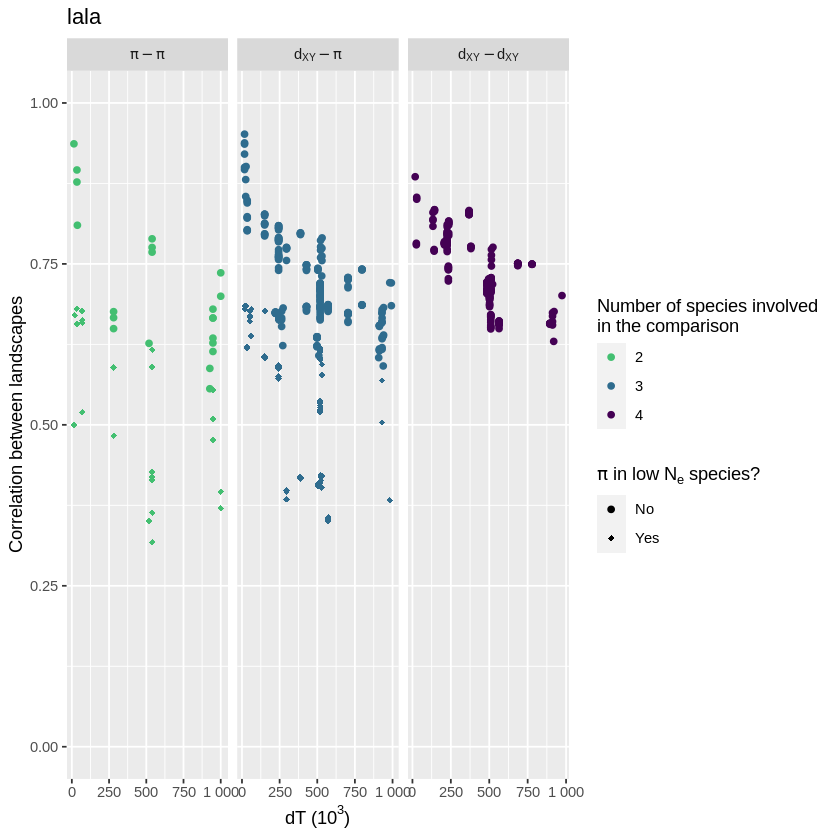

In [35]:
plots[[1]]+ggtitle("lala")

In [ ]:
tmp